# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering. 

## Instructions
  - For each question you need to write the sub-problem formulation in markdown. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline 
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [1]:
import sys
# Install packages correctly
# !{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
# !{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import kneighbors_graph

## Report(Q-1)
As mentioned in mail,either of the fully connected or knn graph can be used.<br>
### Part-1:<br>
I used knn graph from sklearn library as it is giving much better results than fully connected graph.<br><br>
Calculated eigen vector corresponding to second eigen value of laplacian as $1^{st}$ eigen value will always be zero and calculated labels correspondingly.<br>
### part-2:
For nearest neighbors value(k in the function) =4 or 6 points are exactly classified into two circles without any error.<br>
Plots for original and predicted labels are plotted<br>
Increasing the value of k may lead to decrease in accuracy.
### part-3:
Just printed accuracy as plots are already there in part-2

# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



In [2]:
# Part 1: Spectral Clustering
def spectral_clustering(X,k=4):
    """Args:
    X: numpy.array [num_samples, input_dim]

    Returns:
    Y_pred: numpy.array [num_samples]
      array of cluster labels
    """
  # Your code here
#     W= kneighbors_graph(X,X.shape[0]-1, mode='distance',include_self=False).toarray()
    W= kneighbors_graph(X,k, mode='distance',include_self=False).toarray()
#     w=np.power(W,-1)
#     W= kneighbors_graph(X,2, mode='connectivity',include_self=False).toarray()
#     print(W.shape)
    D = np.diag(np.sum(np.array(W), axis=1))
    L = D - W
    e, v = np.linalg.eig(L)
    #sorting according to values and getting indices
    idx=np.argsort(e)
    evals=e[idx]
    v=v[:,idx]
    #we will choose  2nd eigen vector of L as first eigen vector is always zero
    Y_pred=v[:,1]>0
    return Y_pred


## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [3]:
# DO NOT EDIT

from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]


Predicted


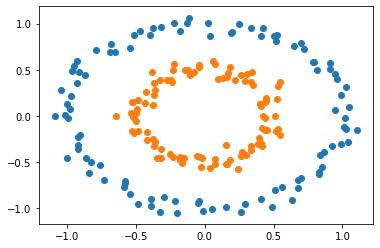

Actual


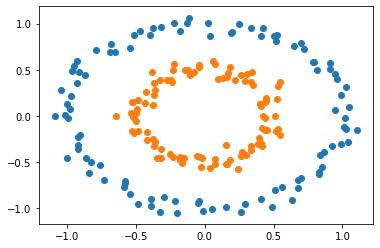

In [4]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)
c1_pred=[]
c2_pred=[]
c1_actual=[]
c2_actual=[]
y_pred=spectral_clustering(CX)
for j in range(CY.shape[0]):
    if(y_pred[j]==0):
        c1_pred.append(CX[j])
    else:
        c2_pred.append(CX[j])
    if(CY[j]==0):
        c1_actual.append(CX[j])
    else:
        c2_actual.append(CX[j])
c1_pred=np.array(c1_pred)
c2_pred=np.array(c2_pred)
c1_actual=np.array(c1_actual)
c2_actual=np.array(c2_actual)
# print(c1.shape,c2.shape)
print("Predicted")
plt.scatter(c1_pred[:,0],c1_pred[:,1])
plt.scatter(c2_pred[:,0],c2_pred[:,1])
plt.show()
print("Actual")
plt.scatter(c1_actual[:,0],c1_actual[:,1])
plt.scatter(c2_actual[:,0],c2_actual[:,1])
plt.show()

## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

In [5]:
# Part 3: Report the accuracy of clustering
acc=0
for i in range(CY.shape[0]):
    acc+=np.abs(CY[i]-y_pred[i])
acc=(CY.shape[0]-acc)/CY.shape[0]*100
print(str(acc)+'%')
# Graphs already plotted above(True vs Predicted) 

100.0%




---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Report-(Q2)
Not much to write about the process or observations,As i used actual methods to implement mds,isomap,lle<br>
Results are very close to original ones

## Part 1: MDS
Implement Multi-Dimensional Scaling

In [6]:
# Part 1: MDS
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))
def MDS(X, k=6, output_dim=2,di=False):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
    n = X.shape[0]
    mr = 1/n*np.sum(X, axis=0)
    mc = 1/n*np.sum(X, axis=1)[:, np.newaxis]
    ma = 1/n*mr.sum()
    X =X- mr-mc+ma
    eig, eig_vec = np.linalg.eigh(X.dot(X.T))
    eig_pairs=[]
    for i in range(len(eig)):
        eig_pairs.append((np.abs(eig[i]), eig_vec[:, i]))
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_pairs = np.array(eig_pairs)
    Y=[]
    for i in range(output_dim):
        if len(Y)==0:
            Y=np.array(eig_pairs[i, 1].reshape(X.shape[0], 1))
        else:
            Y=np.append(Y,eig_pairs[i, 1].reshape(X.shape[0], 1),axis=1)
    return Y

## Part 2: LLE
Implement Locally Linear Embedding function

In [7]:
# Part 2: LLE
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))
def LLE(X, k=6, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
  # Your code here
    distances = np.array([[dist(p1, p2) for p2 in X] for p1 in X])
    neighbors = np.zeros_like(distances)
    neighbors_idx = np.argsort(distances, axis=1)[:, 1:k+1]
#     print(neighbors_idx.shape)
    n = X.shape[0]
    w = np.zeros((n, n))
    for i in range(n):
        k_indexes = neighbors_idx[i, :]
        neighbors = X[k_indexes, :] - X[i, :]
#         if(i==0):
#             print(X[k_indexes, :])
#             print(X[i,:])
#             print(neighbors)
        g_inv = np.linalg.pinv(np.dot(neighbors, neighbors.T))
#         w_temp=gram_inv.dot(np.ones(k).T)
        w[i, k_indexes] = np.sum(g_inv, axis=1)/np.sum(np.sum(g_inv, axis=1))
#         if i==0:
#             print(g_inv)
#             print(np.sum(g_inv, axis=1))
#             print(w[i,k_indexes])
    m = np.subtract(np.eye(n), w)
    values, u = np.linalg.eigh(np.dot(np.transpose(m), m))
    return u[:, 1:output_dim+1]
#     return Y

## Part 3: ISOMAP
Implement Isomap Visualization  

In [8]:
# Part 3: Isomap
from sklearn.utils.graph import graph_shortest_path
def ISOMAP(X, k=6, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
    # Your code here
    distances = np.array([[dist(p1, p2) for p2 in X] for p1 in X])
    data = np.zeros_like(distances)
    sort_distances = np.argsort(distances, axis=1)[:, 1:k+1]
    for k,i in enumerate(sort_distances):
        data[k,i] = distances[k,i]
    print(data.shape)
    graph = graph_shortest_path(data, directed=False)
#     print(graph)
    graph = -0.5 * (graph**2)
    return MDS(graph, output_dim)

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [9]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

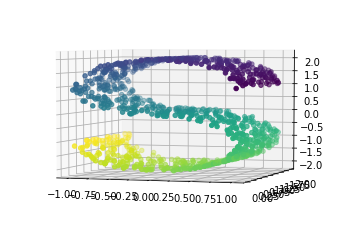

(1000, 2)


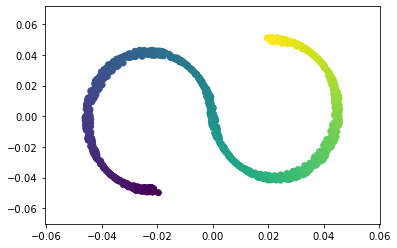

(1000, 1000)


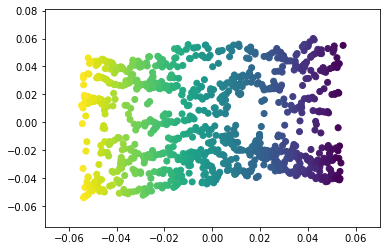

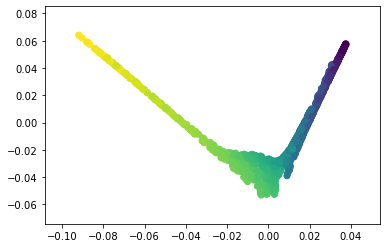

In [10]:
#  Visualization code here
ax = plt.axes(projection='3d')
ax.scatter(SX[:,0],SX[:,1],SX[:,2],c=St)
ax.view_init(4, -72) 
plt.show()

m=np.real(MDS(SX))
print(m.shape)
plt.scatter(m[:,0],m[:,1],c=St)
plt.show()

m=ISOMAP(SX)
plt.scatter(m[:,0],m[:,1],c=St)
plt.show()

D_reduced=LLE(SX)
plt.scatter(D_reduced[:,0],D_reduced[:,1],c=St)
plt.show()


# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [11]:
# Swiss roll dataset loading here
from sklearn.cluster import SpectralClustering 
d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = np.array(d)
print (swissroll.shape)

(1600, 3)


Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

## Report -Q3(above every block seperately)

Using spectral_clustering implemented in first question with nearest neighbors=5<br>
Also commented directed implementation code from sklearn library just to compare results(They are almost identical)

In [12]:
# CODE HERE
# spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors',n_neighbors=5) 
  
# Training the model and Storing the predicted cluster labels 
# labels_rbf = spectral_model_rbf.fit_predict(swissroll)
#own implementation in 1st question above commented lines are inbuilt just to verify
labels_rbf=spectral_clustering(swissroll,k=5)

Plot of swissroll graph with labels obtained from spectral clustering in above block

734


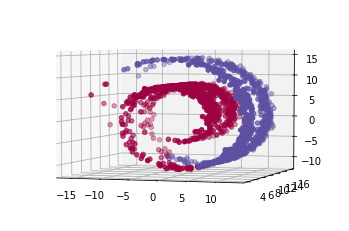

In [13]:
print(np.sum(labels_rbf))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(swissroll[:,0],swissroll[:,1],swissroll[:,2],c=labels_rbf, cmap=plt.cm.Spectral)
# for i in range(St.shape[0]):
ax.view_init(4, -72) 

### Using the 3 methods implemented in 2nd question and plotting the obtained results<br>
Uncomment the below commented lines in the block to view $2^{nd}$,$4^{th}$,$6^{th}$ plots(very similar to obtained ones)<br>
$1^{st}$ plot corresponds to implemented mds<br>
$2^{nd}$ plot corresponds to  mds from sklearn library<br>
$3^{rd}$ plot corresponds to implemented isomap<br>
$4^{th}$ plot corresponds to isomap from sklearn library<br>
$5^{th}$ plot corresponds to implemented lle<br>
$6^{th}$ plot corresponds to lle from sklearn library<br>

### Observations<br>
MDS plot looks similar to swissroll in 2d and hence it is good visualization<br>
Isomap plot clearly showing two seperate clusters which can be sepearted by a hyperplane in 2d,hence this is also good<br>
Lle plot also is good but changing drastically with change in nearest neighbor values used(below plot is for value 10)<br>

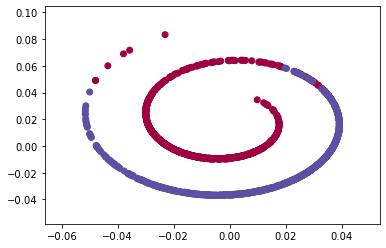

(1600, 1600)


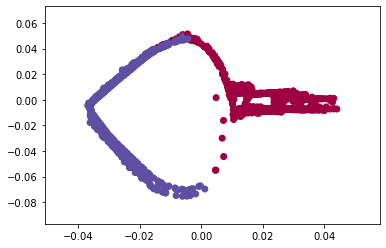

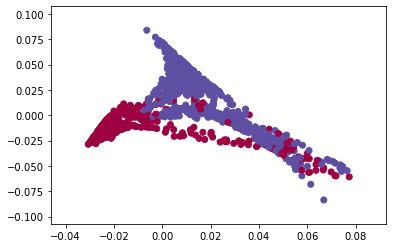

In [16]:
m=np.real(MDS(swissroll))
# print(m)
plt.scatter(m[:,0],m[:,1],c=labels_rbf,cmap=plt.cm.Spectral)
plt.show()

# from sklearn.manifold import MDS as mds_lib
# model = mds_lib(n_components=2)
# m=model.fit_transform(swissroll)
# plt.scatter(m[:,0],m[:,1],c=labels_rbf,cmap=plt.cm.Spectral)
# plt.show()

m=ISOMAP(swissroll)
plt.scatter(m[:,0],m[:,1],c=labels_rbf,cmap=plt.cm.Spectral)
plt.show()

# from sklearn.manifold import Isomap
# model = Isomap(n_neighbors=4, n_components=2)
# m=model.fit_transform(swissroll)
# plt.scatter(m[:,0],m[:,1],c=labels_rbf,cmap=plt.cm.Spectral)
# plt.show()

D_reduced=LLE(swissroll,k=10)
plt.scatter(D_reduced[:,0],D_reduced[:,1],c=labels_rbf,cmap=plt.cm.Spectral)
plt.show()

# from sklearn.manifold import LocallyLinearEmbedding
# model = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
# m=model.fit_transform(swissroll)
# plt.scatter(m[:,0],m[:,1],c=labels_rbf,cmap=plt.cm.Spectral)
# plt.show()



---



# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [17]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.preprocessing import OneHotEncoder
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
import keras
from keras.models import Sequential
from keras.layers import Dense
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial dimensionality/number of features (32*32*3) = 3072.

Using TensorFlow backend.


In [18]:
# Just for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

## Report -Q4(above every block seperately)

Used PCA of sklearn library to implement below function

In [19]:
def reductionUsingPCA(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    pca_X: numpy.array [n_samples, output_dim]
    """
    pca = PCA(n_components=output_dim)
    pca_X=pca.fit_transform(X)
  # Enter your code here
    return pca_X

Used Isomap of sklearn library to implement below function

In [20]:
def reductionUsingISOMAP(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    isomap_X: numpy.array [n_samples, output_dim]
    """
    # Enter your code here
    model = Isomap(n_neighbors=k, n_components=output_dim)
    isomap_X=model.fit_transform(X)
    return isomap_X

Used Keras Library to implement Nueral Network for Classification<br>
#### Nueral Network Details:<br>
input layer->reduced dimension number of nodes given as input to function<br>
$1^{st}$ hidden layer->50 nodes,relu activation function<br>
$2^{nd}$ hidden layer->100 nodes,relu activaition function<br>
Output layer->softmax function with 10 nodes as it is a multi-class classification with 10 classes<br>
Loss function->Cross-Entropy<br>

In [21]:
# Classification Algorithm 
# Extra functions here

def classification(X, y,X_t,n_classes,dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    n_classes: number of classes

    Returns:
    labels: numpy_array [n_samples]
    """
    # Your code here
    model = Sequential()
    model.add(Dense(50, input_dim=dim, activation='relu'))
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X, y, epochs=100, batch_size=64,verbose=0)
    labels_train = model.predict(X)
    labels_test=model.predict(X_t)
    return labels_train,labels_test,history.history['accuracy'][len(history.history['accuracy'])-1]


Used f1_score from sklearn.metrics  and averaging technique used is micro as it is a multi-class problem<br>
Other averaging methods like macro,etc... are possible

In [22]:
from sklearn.metrics import f1_score
def F1_score(y_true, y_pred):
    """Args:
    y_true: numpy.array [n_samples] , ground truth value
    y_pred: numpy.array [n_samples] , predicted value by classifier

    Returns:
    score: float, f1-score
    """
    # Enter your code here
    return f1_score(y_true,y_pred,average='micro')

Used above Isomap function and reduced to 100 dimensions with 6 nearest neighbors
Also obtained one-hot lables from original labels to provide to nueral network for classification

In [23]:
# X_new_1=reductionUsingPCA(X_train,2,100)
# X_new_2=reductionUsingPCA(X_test,2,100)
X_new_1=reductionUsingISOMAP(X_train,6,100)
X_new_2=reductionUsingISOMAP(X_test,6,100)
ohe = OneHotEncoder()
y_new_1 = ohe.fit_transform(y_train).toarray()
# y_new_2 = ohe.fit_transform(y_test).toarray()
# print(np.max(y_train))

After reducing the dimensions to 100,we can take that many of columns from obtained_matrix(X_new_1) corresponding to required reduced dimension.<br>
Below block does classification with reduced dimension b/w 2 to 10 and stores the accuarcy and f1-scores corresponding to every reduced dimension value. 

In [24]:
f1_isomap=[]
acc_isomap=[]
for i in range(2,10):
    labels_tr,labels_te,acc=classification(X_new_1[:,:i],y_new_1,X_new_2[:,:i],10,i)
    labels_test=np.argmax(labels_te, axis=1)
    f1_isomap.append(F1_score(y_test,labels_test))
    acc_isomap.append(acc)
f1_isomap=np.array(f1_isomap)
acc_isomap=np.array(acc_isomap)

Used above Pca function and reduced to 100 dimensions.<br>
After that similar process is repeated as done for Isomap

In [25]:
X_new_1=reductionUsingPCA(X_train,2,100)
X_new_2=reductionUsingPCA(X_test,2,100)
f1_pca=[]
acc_pca=[]
for i in range(2,10):
    labels_tr,labels_te,acc=classification(X_new_1[:,:i],y_new_1,X_new_2[:,:i],10,i)
    labels_test=np.argmax(labels_te, axis=1)
    f1_pca.append(F1_score(y_test,labels_test))
    acc_pca.append(acc)
f1_pca=np.array(f1_pca)
acc_pca=np.array(acc_pca)

Plotted accuracy results obtained for pca and isomap above.(All the results are for test data,training data used only for training)<br>
You can clearly observe accuracy improving as number of dimensions used are increasing from 2 to 10
Comparitively in this dimension range(2-10) pca gave better results than isomap for same dimensions

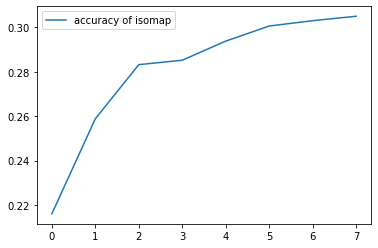

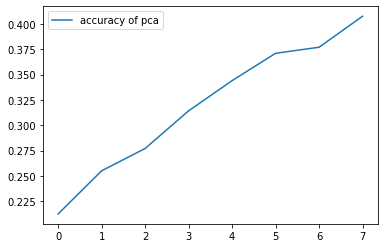

In [27]:
plt.plot(acc_isomap,label="accuracy of isomap")
plt.legend()
plt.show()
plt.plot(acc_pca,label="accuracy of pca")
plt.legend()
plt.show()

Finally,for last part f1-score is said to be reported for any two dimensions.<br>
Just printing the results accumulated above for dimensions(2-10)<br>
Dim-1=5<br>
Dim-2=7<br>
These two dimensions are used for printing f1-scores using both pca and isomap<br>
F1-score is better for pca compared to isomap for both dimensions.<br>
May be increasing dimension to significant values like 100 may result better accuracy for isomap compared to pca but not sure.

In [29]:
dim1=5
print("Reduced-Dimension=5")
print("F1-score for pca")
print(f1_pca[5])
print("F1-score for isomap")
print(f1_isomap[5])
dim2=7
print("Reduced-Dimension=7")
print("F1-score for pca")
print(f1_pca[7])
print("F1-score for isomap")
print(f1_isomap[7])

Reduced-Dimension=5
F1-score for pca
0.292
F1-score for isomap
0.113
Reduced-Dimension=7
F1-score for pca
0.282
F1-score for isomap
0.122
